In [72]:
# This program is developed by pooyanosk1382

In [73]:
# import libraries and modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [67]:
# open file of prices
df = pd.read_csv('Price.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61667
1,60,1,True,True,True,Shahran,1850000000,61667
2,79,2,True,True,True,Pardis,550000000,18333
3,95,2,True,True,True,Shahrake Qods,902500000,30083
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333


In [68]:
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
26,77,2,True,True,True,Amirieh,1771000000,59033
31,49,1,True,True,True,West Ferdows Boulevard,2200000000,73333
87,140,1,False,False,False,Northern Janatabad,580000000,19333
68,60,1,True,True,True,East Ferdows Boulevard,2450000000,81667
5,70,2,True,True,False,North Program Organization,2050000000,68333


In [69]:
type(df)

pandas.core.frame.DataFrame

In [70]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [74]:
# show information of table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        150 non-null    int64  
 1   Room        150 non-null    int64  
 2   Parking     150 non-null    bool   
 3   Warehouse   150 non-null    bool   
 4   Elevator    150 non-null    bool   
 5   Address     150 non-null    object 
 6   Price       150 non-null    int64  
 7   Price(USD)  150 non-null    float64
dtypes: bool(3), float64(1), int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
# show some prob elements like mean and std of each column
df.describe()

,Area,Room,Price,Price(USD)
count,150.000000,150.000000,1.500000e+02,150.000000
mean,92.600000,1.946667,3.163967e+09,105465.577467
std,36.849048,0.702695,3.109839e+09,103661.311760
min,40.000000,0.000000,3.600000e+06,120.000000
25%,66.250000,2.000000,1.285000e+09,42833.335000
50%,85.000000,2.000000,2.200000e+09,73333.330000
75%,113.750000,2.000000,3.795000e+09,126500.000000
max,300.000000,3.000000,2.000000e+10,666666.670000


In [9]:
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        150 non-null    int64  
 1   Room        150 non-null    int64  
 2   Parking     150 non-null    bool   
 3   Warehouse   150 non-null    bool   
 4   Elevator    150 non-null    bool   
 5   Address     150 non-null    object 
 6   Price       150 non-null    int64  
 7   Price(USD)  150 non-null    float64
dtypes: bool(3), float64(1), int64(3), object(1)
memory usage: 6.4+ KB


In [11]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
145,70,2,False,True,True,Saadat Abad,1800000000,60000.00
146,150,3,True,True,True,Golestan,20000000000,666666.67
147,95,2,True,True,True,Southern Janatabad,950000000,31666.67
148,127,2,True,True,True,Shahr-e-Ziba,6000000000,200000.00


In [12]:
df.shape

(150, 8)

In [13]:
print(df.dtypes)

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price           int64
Price(USD)    float64
dtype: object


In [14]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(150, 8)

In [17]:
df['Parking'].value_counts(normalize=True)*100

True     82.666667
False    17.333333
Name: Parking, dtype: float64

In [18]:
pd.crosstab( df.Parking, df.Room )

Room,0,1,2,3
Parking,,,,
False,2,8,14,2
True,0,27,68,29


In [19]:
below_85 = df[ df.Area <= 85 ]
len(below_85)

77

In [20]:
df[ df.Area <= 85 ]["Parking"].value_counts( )

True     59
False    18
Name: Parking, dtype: int64

In [21]:
# all of addresses
df.Address.unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [22]:
len(df.Address.unique())

66

In [23]:
round(df.Price.mean())

3163967333

In [24]:
df.groupby( 'Room' )['Price'].mean()

Room
0    2.065000e+08
1    1.843246e+09
2    2.623945e+09
3    6.274355e+09
Name: Price, dtype: float64

In [25]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [26]:
# number of rooms and having parking with its price
room_parking_room_mean_df = df.groupby( ['Room','Parking'] )['Price'].mean().reset_index()
room_parking_room_mean_df

,Room,Parking,Price
0,0,False,206500000
1,1,False,784200000
2,1,True,2157037037
3,2,False,998928571
4,2,True,2958507353
5,3,False,560000000
6,3,True,6668448276


In [27]:
df2 = df.copy()

In [28]:
df2.loc[:, "Price"] =df["Price"].map('{:,.0f}'.format)

In [29]:
df2

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,"1,850,000,000",61667
1,60,1,True,True,True,Shahran,"1,850,000,000",61667
2,79,2,True,True,True,Pardis,"550,000,000",18333
3,95,2,True,True,True,Shahrake Qods,"902,500,000",30083
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000",233333
...,...,...,...,...,...,...,...,...
145,70,2,False,True,True,Saadat Abad,"1,800,000,000",60000
146,150,3,True,True,True,Golestan,"20,000,000,000",666667
147,95,2,True,True,True,Southern Janatabad,"950,000,000",31667
148,127,2,True,True,True,Shahr-e-Ziba,"6,000,000,000",200000


In [30]:
df.dtypes

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price           int64
Price(USD)    float64
dtype: object

<Figure size 800x500 with 0 Axes>

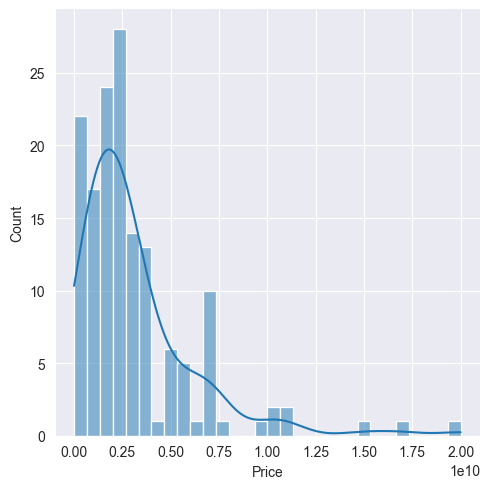

In [31]:
plt.figure(figsize=(8,5))
sns.displot(df['Price'] , bins=30 , kde=True )

<AxesSubplot: >

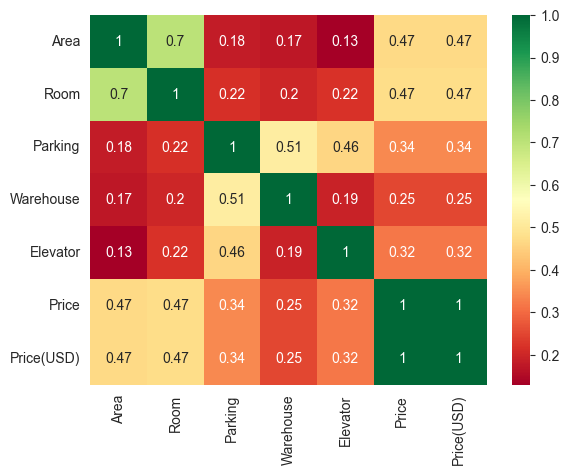

In [32]:
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn')

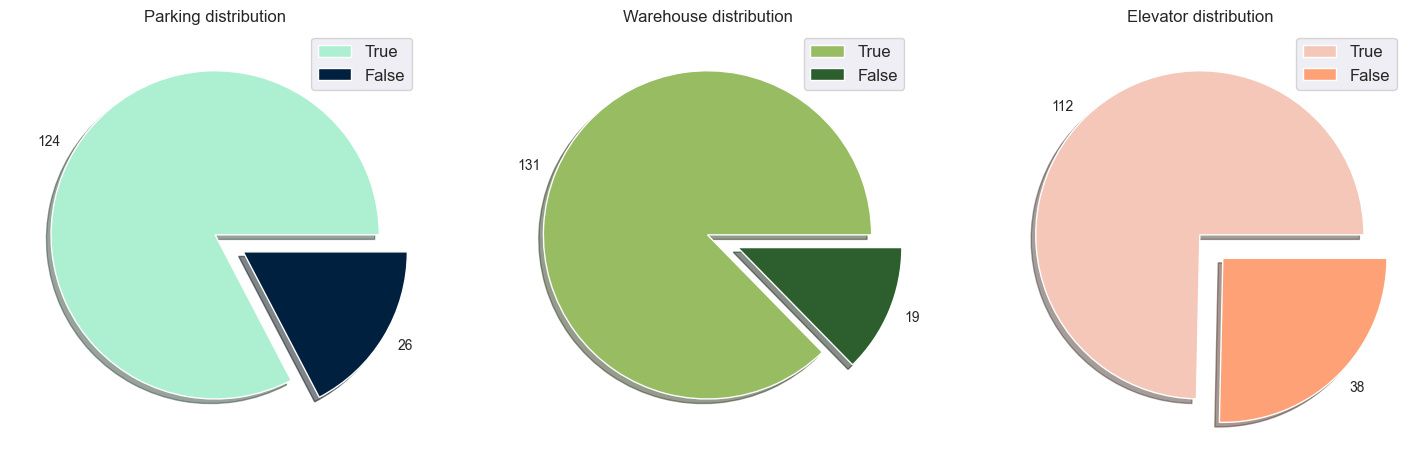

In [33]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
    data = df[columns[i]].value_counts()
    ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
    ax[i].legend(labels=data.index, fontsize='large')
    ax[i].set_title('{} distribution'.format(columns[i]))

In [34]:
df3 = df['Address'].value_counts().copy()
df3 = df3[:8]

Text(0.5, 1.0, 'Number of flats in location')

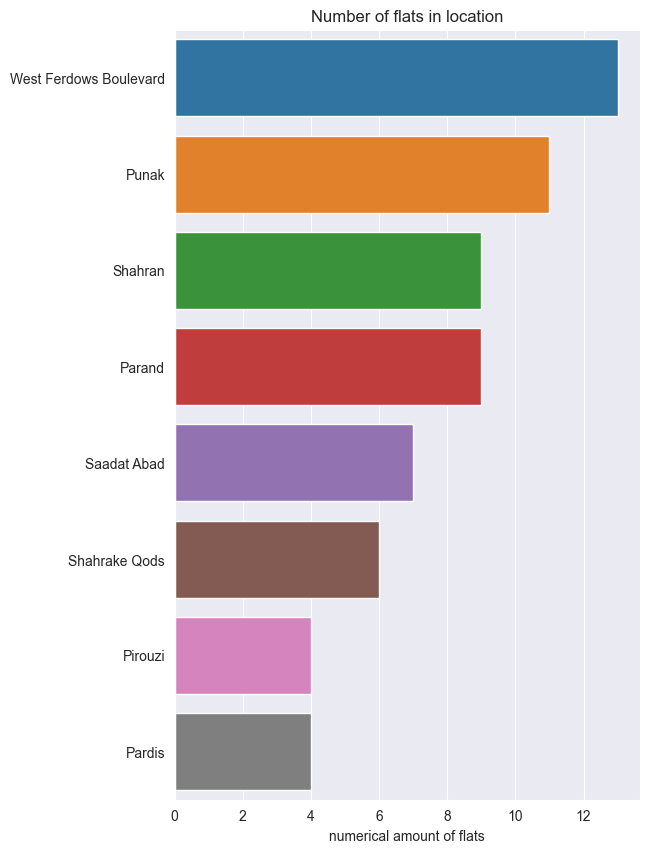

In [35]:
fig, ax = plt.subplots(figsize=(6,10))
sns.barplot(x=df3.values, y=df3.index,ax=ax)
plt.xlabel('numerical amount of flats')
plt.title('Number of flats in location')

In [36]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [37]:
df.sort_values('Price',ascending=False)[['Address']].head(20)

,Address
146,Golestan
102,Shahrake Qods
25,Velenjak
115,Parand
13,Saadat Abad
82,Shahran
76,Shahran
52,Parand
32,Zargandeh
121,Keshavarz Boulevard


In [38]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [39]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61667
1,60,1,True,True,True,Shahran,1850000000,61667
2,79,2,True,True,True,Pardis,550000000,18333
3,95,2,True,True,True,Shahrake Qods,902500000,30083
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333
...,...,...,...,...,...,...,...,...
145,70,2,False,True,True,Saadat Abad,1800000000,60000
146,150,3,True,True,True,Golestan,20000000000,666667
147,95,2,True,True,True,Southern Janatabad,950000000,31667
148,127,2,True,True,True,Shahr-e-Ziba,6000000000,200000


In [40]:
df = df.drop(columns = ['Price(USD)'])
boolean_features = ['Parking','Warehouse','Elevator']
df[boolean_features] = df[boolean_features].astype('int64')

df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1850000000
1,60,1,1,1,1,Shahran,1850000000
2,79,2,1,1,1,Pardis,550000000
3,95,2,1,1,1,Shahrake Qods,902500000
4,123,2,1,1,1,Shahrake Gharb,7000000000


In [41]:
print(f"Skewness of features:\n{df.skew()}")

Skewness of features:
Area         2
Room        -0
Parking     -2
Warehouse   -2
Elevator    -1
Price        3
dtype: float64


<AxesSubplot: xlabel='Price'>

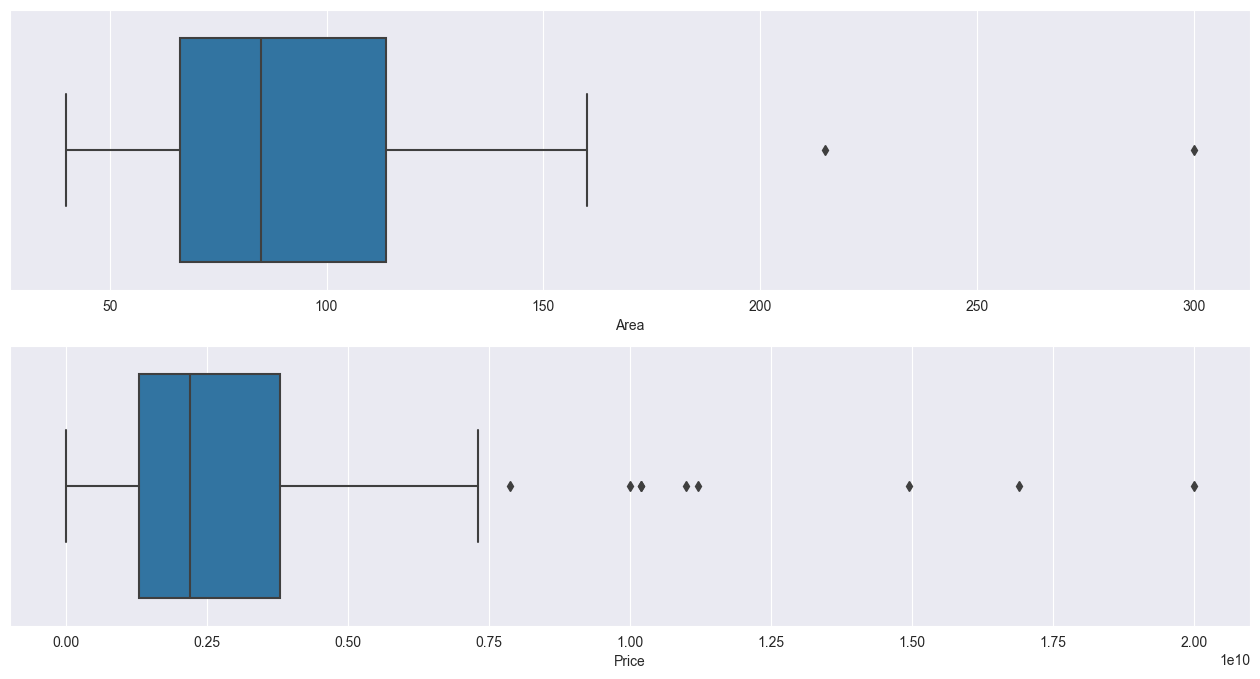

In [42]:
plt.figure(figsize = (16,8))

plt.subplot(2,1,1)
sns.boxplot(x = df['Area'])

plt.subplot(2,1,2)
sns.boxplot(x = df['Price'])

In [43]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -5.00
Upper limit for area: 185.00
Lower limit for price: -2,480,000,000.0
Upper limit for price: 7,560,000,000.0


In [44]:
area_outliers = np.where(df['Area'] > upper_area)
price_outliers = np.where(df['Price'] > upper_price)

total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of outliers: {len(df.iloc[total_outliers])}")

Number of area outliers: 2
Number of price outliers: 9
Number of outliers: 11


In [45]:
total_outliers

array([ 13,  25,  32,  52,  59,  76,  82,  84, 102, 115, 146], dtype=int64)

In [47]:
address_dummy = pd.get_dummies(df['Address'])
df_final = df.merge(address_dummy, left_index = True, right_index = True)
df_final.drop(columns = 'Address', inplace = True)
df_final.head(3)

,Area,Room,Parking,Warehouse,Elevator,Price,Abbasabad,Afsarieh,Amirieh,Andisheh,...,Shahryar,Shams Abad,Southern Janatabad,Southern Program Organization,Velenjak,Water Organization,West Ferdows Boulevard,West Pars,Zafar,Zargandeh
0,63,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,550000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_final

,Area,Room,Parking,Warehouse,Elevator,Price,Abbasabad,Afsarieh,Amirieh,Andisheh,...,Shahryar,Shams Abad,Southern Janatabad,Southern Program Organization,Velenjak,Water Organization,West Ferdows Boulevard,West Pars,Zafar,Zargandeh
0,63,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,550000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,902500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,7000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,70,2,0,1,1,1800000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,150,3,1,1,1,20000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,95,2,1,1,1,950000000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
148,127,2,1,1,1,6000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X = df_final.drop(columns = 'Price')
y = df_final['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (120, 71)
shape of y train: (120,)
shape of x test: (30, 71)
shape of y train: (30,)


In [50]:
def parameter_finder (model, parameters):

    start = time.time()

    grid = GridSearchCV(model,
                        param_grid = parameters,
                        refit = True,
                        cv = KFold(shuffle = True, random_state = 1),
                        n_jobs = -1)
    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)

    train_score =grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    model_name = str(model).split('(')[0]

    end = time.time()

    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")


    return train_score, test_score, RMSE

In [51]:
lr = LinearRegression(n_jobs = -1)

lr_train_score, lr_test_score, lr_RMSE = parameter_finder(lr, {})

The best parameters for LinearRegression model is: {}
--------------------
(R2 score) in the training set is 68.50% for LinearRegression model.
(R2 score) in the testing set is 41.36% for LinearRegression model.
RMSE is 1,824,048,333.2429163 for LinearRegression model.
--------------------
Runtime of the program is: 1.97


In [55]:
ridge = Ridge(random_state = 1)
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge_train_score, ridge_test_score, ridge_RMSE = parameter_finder(ridge, param_ridge)

The best parameters for Ridge model is: {'alpha': 10}
--------------------
(R2 score) in the training set is 39.18% for Ridge model.
(R2 score) in the testing set is 56.04% for Ridge model.
RMSE is 1,579,407,083.037753 for Ridge model.
--------------------
Runtime of the program is: 0.06


In [57]:
lasso = Lasso(random_state = 1)
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_train_score, lasso_test_score, lasso_RMSE = parameter_finder(lasso, param_lasso)

The best parameters for Lasso model is: {'alpha': 10}
--------------------
(R2 score) in the training set is 68.50% for Lasso model.
(R2 score) in the testing set is 41.20% for Lasso model.
RMSE is 1,826,492,005.8033714 for Lasso model.
--------------------
Runtime of the program is: 0.09


In [59]:
eln = ElasticNet(random_state = 1)
param_eln = {'alpha': [0.001, 0.01, 0.1, 1, 10],
             'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7]}
eln_train_score, eln_test_score, eln_RMSE = parameter_finder(eln, param_eln)

The best parameters for ElasticNet model is: {'alpha': 0.1, 'l1_ratio': 0.3}
--------------------
(R2 score) in the training set is 40.50% for ElasticNet model.
(R2 score) in the testing set is 55.74% for ElasticNet model.
RMSE is 1,584,720,175.7839758 for ElasticNet model.
--------------------
Runtime of the program is: 0.16


In [60]:
dtr = DecisionTreeRegressor(random_state = 1)
param_dtr = {'min_samples_split': [2, 3, 4, 5],
             'min_samples_leaf': [1, 2, 3]}
dtr_train_score, dtr_test_score, dtr_RMSE = parameter_finder(dtr, param_dtr)

The best parameters for DecisionTreeRegressor model is: {'min_samples_leaf': 3, 'min_samples_split': 2}
--------------------
(R2 score) in the training set is 61.53% for DecisionTreeRegressor model.
(R2 score) in the testing set is 67.11% for DecisionTreeRegressor model.
RMSE is 1,366,012,624.124872 for DecisionTreeRegressor model.
--------------------
Runtime of the program is: 0.16


In [61]:
rfr = RandomForestRegressor(random_state = 1, n_jobs = -1)
param_rfr = {'min_samples_split': [2, 3, 4, 5],
             'min_samples_leaf': [1, 2, 3]}
rfr_train_score, rfr_test_score, rfr_RMSE = parameter_finder(rfr, param_rfr)

The best parameters for RandomForestRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 4}
--------------------
(R2 score) in the training set is 86.84% for RandomForestRegressor model.
(R2 score) in the testing set is 75.18% for RandomForestRegressor model.
RMSE is 1,186,789,682.6974113 for RandomForestRegressor model.
--------------------
Runtime of the program is: 2.35


In [62]:
knr = KNeighborsRegressor(n_jobs = -1)
param_knr = {'n_neighbors': [5, 10, 15, 20],
             'weights': ['uniform', 'distance']}

knr_train_score, knr_test_score, knr_RMSE = parameter_finder(knr, param_knr)

The best parameters for KNeighborsRegressor model is: {'n_neighbors': 20, 'weights': 'uniform'}
--------------------
(R2 score) in the training set is 30.86% for KNeighborsRegressor model.
(R2 score) in the testing set is 68.82% for KNeighborsRegressor model.
RMSE is 1,330,031,668.1903355 for KNeighborsRegressor model.
--------------------
Runtime of the program is: 0.18


In [63]:
xgboost = XGBRegressor(n_jobs = -1)
param_xgboost = {'n_estimators': [100,300],
                 'learning_rate': [0.1,0.05],
                 'subsample': [0.75],
                 'colsample_bytree': [1],
                 'max_depth': [3,4,5],
                 'gamma': [0]}
xgboost_train_score, xgboost_test_score, xgboost_RMSE = parameter_finder(xgboost, param_xgboost)

The best parameters for XGBRegressor model is: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.75}
--------------------
(R2 score) in the training set is 82.35% for XGBRegressor model.
(R2 score) in the testing set is 77.07% for XGBRegressor model.
RMSE is 1,140,751,297.0548434 for XGBRegressor model.
--------------------
Runtime of the program is: 2.86


In [64]:
models_score = pd.DataFrame({'Training score': [lr_train_score, ridge_train_score, lasso_train_score, eln_train_score, dtr_train_score, rfr_train_score, knr_train_score,xgboost_train_score],
                             'Testing score': [lr_test_score, ridge_test_score, lasso_test_score, eln_test_score, dtr_test_score, rfr_test_score, knr_test_score,xgboost_test_score],
                             'RMSE': [lr_RMSE, ridge_RMSE, lasso_RMSE, eln_RMSE, dtr_RMSE, rfr_RMSE, knr_RMSE,xgboost_RMSE]},
                            index = ['LinearRegression', 'Ridge', 'Lasso','ElasticNet', 'DecisionTreeRegressor', 'RandomForestRegressor', 'KNeighborsRegressor','XGBoostRegressor'])

models_score

,Training score,Testing score,RMSE
LinearRegression,1,0,1824048333
Ridge,0,1,1579407083
Lasso,1,0,1826492006
ElasticNet,0,1,1584720176
DecisionTreeRegressor,1,1,1366012624
RandomForestRegressor,1,1,1186789683
KNeighborsRegressor,0,1,1330031668
XGBoostRegressor,1,1,1140751297


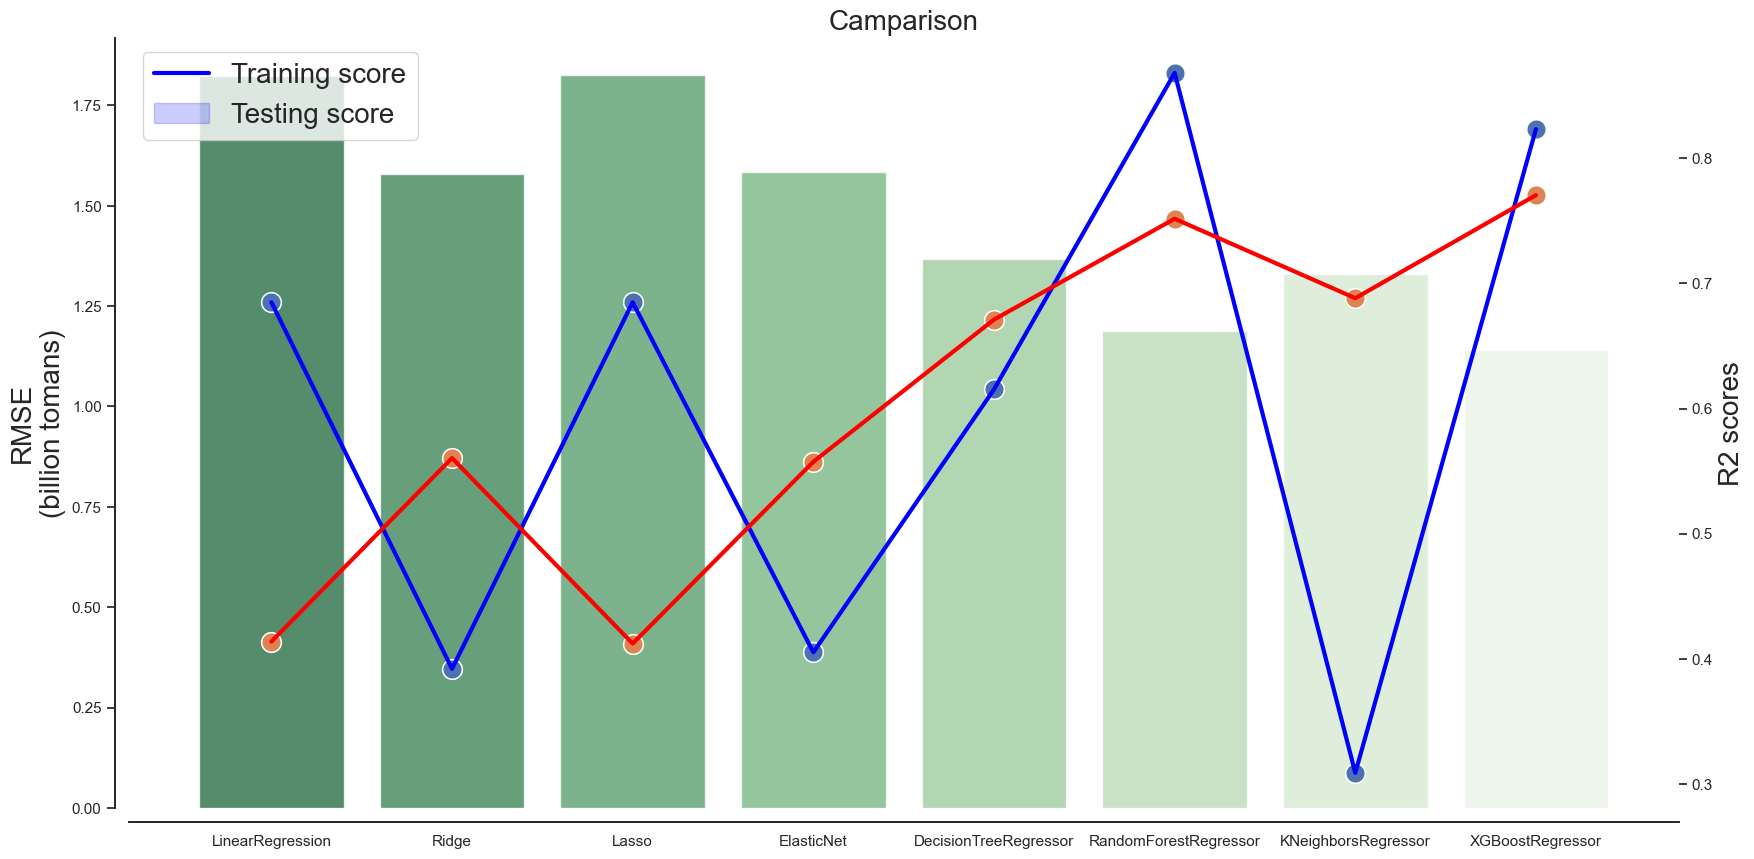

In [71]:
fig, ax = plt.subplots(figsize=(20,10))

sns.set(style='white')

ax.set_title("Camparison", fontsize = 20)

ax = sns.barplot(x = list(models_score.index), y = models_score['RMSE']/1000000000, alpha = 0.7, palette='Greens_r')

ax.set_ylabel("RMSE\n(billion tomans)", fontsize = 20)

sec_ax = ax.twinx()

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Training score'], linewidth = 3, color = 'blue')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Training score'], s = 200)

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Testing score'], linewidth = 3, color = 'red')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Testing score'], s = 200)

sec_ax.set_ylabel("R2 scores", fontsize = 20)

sec_ax.legend(labels = ['Training score', 'Testing score'], fontsize = 20)


sns.despine(offset = 10)

plt.show()